In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv(r'TMA_Data.csv')
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


In [3]:
df['Performance Score'] = df['PerformanceScore']

# Question 1(b): 
Read the data and create the same two (2) charts and their corresponding summarised tables produced in Part (a), using Python.

In [4]:
df1 = df[["Gender",'Performance Score']].copy()
df1.groupby(['Performance Score', 'Gender']).size()

Performance Score  Gender
Exceed             F          16
                   M          14
Meet               F         119
                   M          82
PIP                F           1
                   M           1
To Improve         F           8
                   M           9
dtype: int64

<AxesSubplot:xlabel='Performance Score,Gender'>

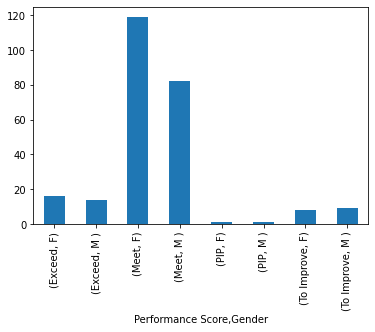

In [5]:
df1.groupby(['Performance Score', 'Gender']).size().plot(kind="bar")

In [6]:
output = pd.pivot_table(data=df, 
                        index=['PerformanceScore','Gender'],
                        values=['Performance Score'],
                        aggfunc='count')
output

Performance Score
PerformanceScore Gender                   
Exceed           F                      16
                 M                      14
Meet             F                     119
                 M                      82
PIP              F                       1
                 M                       1
To Improve       F                       8
                 M                       9

<AxesSubplot:xlabel='PerformanceScore,Gender'>

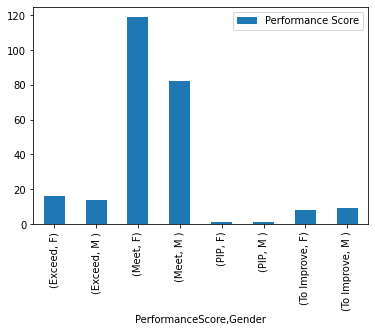

In [7]:
output.plot(kind="bar")

In [8]:
df1 = df[["Citizenship",'Marital',"Salary"]].copy()
df1.groupby(['Citizenship', 'Marital']).aggregate("Salary").sum()

Citizenship   Marital 
Citizen       Divorced    1314902
              Married     5284697
              Others       905391
              Single      6104280
Non-Resident  Married      356644
              Others        67176
              Single       736009
PR            Divorced     355489
              Married     1110477
              Others        52788
              Single       991771
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Citizenship,Marital'>

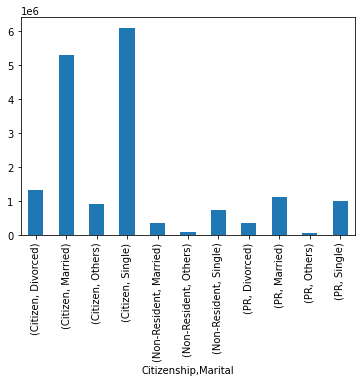

In [9]:
df1.groupby(['Citizenship', 'Marital']).aggregate("Salary").sum().plot(kind="bar")

In [10]:
output2 = pd.pivot_table(data=df, 
                        index=['Citizenship','Marital'],
                        values=['Salary'],
                        aggfunc='sum')
output2

Salary
Citizenship  Marital          
Citizen      Divorced  1314902
             Married   5284697
             Others     905391
             Single    6104280
Non-Resident Married    356644
             Others      67176
             Single     736009
PR           Divorced   355489
             Married   1110477
             Others      52788
             Single     991771

<AxesSubplot:xlabel='Citizenship,Marital'>

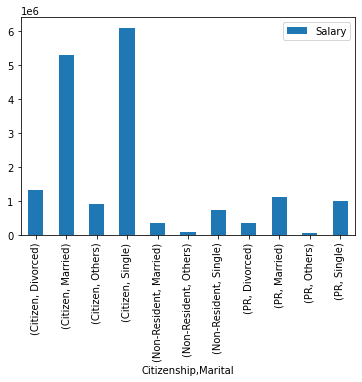

In [11]:
output2.plot(kind="bar")

# Question 1(c): 
Find the length of service of all the staff, using Python. For staff who has not left the organization, use 1st May 2022 as the LeftDate. State the minimum, maximum and average length of service, expressing in years, rounded to 1 decimal place. (1 year is taken as 365 days.)

In [12]:
df1 = df[["JoinDate","LeftDate"]].copy()
for i in range(len(df1)):
    try:
        df1.iloc[i]['JoinDate'] = (datetime.strptime(df1.iloc[i]['JoinDate'],  "%m-%d-%Y")).date()
    except:
        df1.iloc[i]['JoinDate'] = (datetime.strptime(df1.iloc[i]['JoinDate'],  "%m/%d/%Y")).date()
for i in range(len(df1)):
    if type(df1.iloc[i]['LeftDate']) == str:
        try:
            df1.iloc[i]['LeftDate'] = (datetime.strptime(df1.iloc[i]['LeftDate'],  "%m-%d-%Y")).date()
        except:
            df1.iloc[i]['LeftDate'] = (datetime.strptime(df1.iloc[i]['LeftDate'],  "%m/%d/%Y")).date()
    else:
        df1.iloc[i]['LeftDate'] = (datetime.strptime("05/01/2022",  "%m/%d/%Y")).date()

In [13]:
df1['Service Length in Years'] = round(((df1['LeftDate'] - df1['JoinDate']).dt.days / 365),1)
df1.describe()

,Service Length in Years
count,250.000000
mean,6.818400
std,3.172304
min,0.100000
25%,4.725000
50%,7.300000
75%,8.800000
max,16.300000


In [14]:
while True:
    print("Select from the options below:")
    print("1. Search")
    print("2. Quit")
    x = input("Enter your choice: ")
    if x == "2":
        print()
        print("Quiting!")
        break
    elif x == "1":
        print()
        f = False
        name = input("Please enter full name to search: ")
        for i in range(len(df)):
            if df.iloc[i]['Staff'] == name:
                f = True
        if f:
            print("Staff found!")
        else: 
            print("Staff not found!")
    else:
        print("Wrong Choice")
        print()

Select from the options below:
1. Search
2. Quit
Enter your choice: 1

Please enter full name to search: Munish
Staff not found!
Select from the options below:
1. Search
2. Quit
Enter your choice: Antonina Needham
Wrong Choice

Select from the options below:
1. Search
2. Quit
Enter your choice: 1

Please enter full name to search: Antonina Needham
Staff found!
Select from the options below:
1. Search
2. Quit
Enter your choice: 1

Please enter full name to search: Becky Kent
Staff found!
Select from the options below:
1. Search
2. Quit
Enter your choice: 2

Quiting!
